In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from scipy import stats
import statsmodels.formula.api as smf

wd = '../../Desktop/DAT_03_20_Shaan_Penmetsa/'
charge_data = pd.read_csv(wd+'Medicare_Provider_Charge_Inpatient_DRGALL_FY2014.csv')
hospital_attributes = pd.read_csv(wd+'DefHCData.csv')

In [2]:
charge_data = charge_data.drop('Provider Street Address',axis=1)

In [3]:
charge_data.dtypes

DRG Definition                                 object
Provider Id                                     int64
Provider Name                                  object
Provider City                                  object
Provider State                                 object
Provider Zip Code                               int64
Hospital Referral Region (HRR) Description     object
Total Discharges                                int64
Average Covered Charges                       float64
Average Total Payments                        float64
Average Medicare Payments                     float64
dtype: object

In [4]:
charge_data.head()

,DRG Definition,Provider Id,Provider Name,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,10033,UNIVERSITY OF ALABAMA HOSPITAL,BIRMINGHAM,AL,35233,AL - Birmingham,13,1172866.385,251876.3077,244457.9231
1,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,30103,MAYO CLINIC HOSPITAL,PHOENIX,AZ,85054,AZ - Phoenix,20,437531.300,240422.8000,133509.5500
2,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50108,SUTTER GENERAL HOSPITAL,SACRAMENTO,CA,95816,CA - Sacramento,25,815674.120,233197.4800,221681.8000
3,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50262,RONALD REAGAN U C L A MEDICAL CENTER,LOS ANGELES,CA,90095,CA - Los Angeles,14,1499043.571,415968.7857,366608.9286
4,001 - HEART TRANSPLANT OR IMPLANT OF HEART ASS...,50441,STANFORD HOSPITAL,STANFORD,CA,94305,CA - San Mateo County,23,2238699.130,420865.4783,403453.6522


In [5]:
hospital_attributes = hospital_attributes.drop(['Definitive ID', 'IDN', 'Adjusted Patient Days'], axis=1)

In [6]:
hospital_attributes = hospital_attributes.dropna(subset=['Provider Number'])

In [7]:
hospital_attributes.head()

,Provider Number,Hospital Name,Hospital Type,Firm Type,Ownership,Sole Community Hospital,Academic Medical Center,Market Concentration Index,ACO Affiliations,Total Patient Revenue,...,2014 Discharges,# of Staffed Beds,# of Hospitals,# of Payors,Hospital Compare Overall Rating,Medicare Spending per Patient Percentile,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,HAC FY2015 Percentile,Education Designation
3,49005F,633rd Medical Group - USAF Hospital Langley,Department of Defense Hospital,Hospital,Governmental - Federal,NaN,NaN,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5,421301,Abbeville Area Medical Center,Critical Access Hospital,Hospital,Governmental - County,NaN,NaN,0.80,MyHealth First Network,"$74,603,405",...,563.0,25.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN
6,190034,Abbeville General Hospital,Short Term Acute Care Hospital,Hospital,Governmental - Hospital District,NaN,NaN,0.21,NaN,"$111,331,159",...,1251.0,44.0,NaN,NaN,3.0,7.0,0.5%,-1.96%,67.11,No
7,240057,Abbott Northwestern Hospital,Short Term Acute Care Hospital,Hospital,Voluntary Nonprofit - Other,NaN,NaN,0.07,Allina Integrated Medical Network,"$2,757,487,593",...,36198.0,579.0,NaN,NaN,4.0,73.0,0.19%,0%,48.75,No
8,450558,Abilene Regional Medical Center,Short Term Acute Care Hospital,Hospital,Proprietary - Corporation,NaN,NaN,0.54,NaN,"$914,759,033",...,5852.0,180.0,NaN,NaN,3.0,13.0,-0.14%,-0.26%,54.99,NaN


In [8]:
hospital_attributes['Provider Number'] = hospital_attributes['Provider Number'].convert_objects(convert_numeric=True)
hospital_attributes['Total Patient Revenue'] = (hospital_attributes['Total Patient Revenue'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
hospital_attributes['Net Patient Revenue'] = (hospital_attributes['Net Patient Revenue'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))
hospital_attributes['Total Uncompensated Care Unrimbursed Costs'] = (hospital_attributes['Total Uncompensated Care Unrimbursed Costs'].replace( '[\$,)]','', regex=True )
               .replace( '[(]','-',   regex=True ).astype(float))

/Users/Shaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [9]:
hospital_attributes = hospital_attributes.dropna(subset=['Provider Number'])

In [10]:
hospital_attributes['Provider Number'] = hospital_attributes['Provider Number'].astype(int)

In [11]:
hospital_attributes.dtypes

Provider Number                                        int64
Hospital Name                                         object
Hospital Type                                         object
Firm Type                                             object
Ownership                                             object
Sole Community Hospital                               object
Academic Medical Center                               object
Market Concentration Index                           float64
ACO Affiliations                                      object
Total Patient Revenue                                float64
Net Patient Revenue                                  float64
Gross Medicare Revenue                                object
Net Medicare Revenue                                  object
Payor Mix: Medicare                                   object
Payor Mix: Medicaid                                   object
Payor Mix: Private/Self-Pay/Other                     object
Total Uncompensated Care

In [12]:
data = pd.merge(charge_data, hospital_attributes, how='left', left_on='Provider Id', right_on='Provider Number')

In [13]:
data = data.sort(columns='Provider Id')
data.head()

/Users/Shaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,DRG Definition,Provider Id,Provider Name,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,...,2014 Discharges,# of Staffed Beds,# of Hospitals,# of Payors,Hospital Compare Overall Rating,Medicare Spending per Patient Percentile,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,HAC FY2015 Percentile,Education Designation
172030,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,36301,AL - Dothan,87,24335.63218,4863.747126,...,18489.0,387.0,NaN,NaN,3.0,46.0,0.1%,0%,27.5,No
118504,393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,36301,AL - Dothan,23,42650.21739,9413.304348,...,18489.0,387.0,NaN,NaN,3.0,46.0,0.1%,0%,27.5,No
41854,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,36301,AL - Dothan,82,26723.29268,5818.768293,...,18489.0,387.0,NaN,NaN,3.0,46.0,0.1%,0%,27.5,No
57826,242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,36301,AL - Dothan,11,84830.27273,19307.181820,...,18489.0,387.0,NaN,NaN,3.0,46.0,0.1%,0%,27.5,No
20080,149 - DYSEQUILIBRIUM,10001,SOUTHEAST ALABAMA MEDICAL CENTER,DOTHAN,AL,36301,AL - Dothan,20,22990.80000,4351.350000,...,18489.0,387.0,NaN,NaN,3.0,46.0,0.1%,0%,27.5,No


In [14]:
data.dtypes

DRG Definition                                        object
Provider Id                                            int64
Provider Name                                         object
Provider City                                         object
Provider State                                        object
Provider Zip Code                                      int64
Hospital Referral Region (HRR) Description            object
Total Discharges                                       int64
Average Covered Charges                              float64
Average Total Payments                               float64
Average Medicare Payments                            float64
Provider Number                                      float64
Hospital Name                                         object
Hospital Type                                         object
Firm Type                                             object
Ownership                                             object
Sole Community Hospital 

In [15]:
data = data.drop(['Provider Number', 'Hospital Name', 'Gross Medicare Revenue', 'Net Medicare Revenue', 'HAC FY2015 Percentile', 'Hospital Compare Overall Rating', '# of Staffed Beds', 'Provider City', 'Provider Zip Code', 'Firm Type', 'Hospital Type', '# of Hospitals', '# of Payors'], axis=1)

In [16]:
data['Medicare FY2014 Value-Based Purchasing Adjustment'] = data['Medicare FY2014 Value-Based Purchasing Adjustment'].replace('%','',regex=True).astype('float')/100
data['Medicare FY2014 Readmission Rate Penalty'] = data['Medicare FY2014 Readmission Rate Penalty'].replace('%','',regex=True).astype('float')/100
data['Payor Mix: Medicare'] = data['Payor Mix: Medicare'].replace('%','',regex=True).astype('float')/100
data['Payor Mix: Medicaid'] = data['Payor Mix: Medicaid'].replace('%','',regex=True).astype('float')/100
data['Payor Mix: Private/Self-Pay/Other'] = data['Payor Mix: Private/Self-Pay/Other'].replace('%','',regex=True).astype('float')/100

In [17]:
data['% COGS'] = (data['Total Patient Revenue'] - data['Net Patient Revenue']) / data['Total Patient Revenue']

In [18]:
data.dtypes

DRG Definition                                        object
Provider Id                                            int64
Provider Name                                         object
Provider State                                        object
Hospital Referral Region (HRR) Description            object
Total Discharges                                       int64
Average Covered Charges                              float64
Average Total Payments                               float64
Average Medicare Payments                            float64
Ownership                                             object
Sole Community Hospital                               object
Academic Medical Center                               object
Market Concentration Index                           float64
ACO Affiliations                                      object
Total Patient Revenue                                float64
Net Patient Revenue                                  float64
Payor Mix: Medicare     

In [19]:
data.head()

,DRG Definition,Provider Id,Provider Name,Provider State,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Ownership,...,Payor Mix: Medicare,Payor Mix: Medicaid,Payor Mix: Private/Self-Pay/Other,Total Uncompensated Care Unrimbursed Costs,2014 Discharges,Medicare Spending per Patient Percentile,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,Education Designation,% COGS
172030,690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,87,24335.63218,4863.747126,3675.517241,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,46.0,0.001,0.0,No,0.807248
118504,393 - OTHER DIGESTIVE SYSTEM DIAGNOSES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,23,42650.21739,9413.304348,8656.086957,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,46.0,0.001,0.0,No,0.807248
41854,194 - SIMPLE PNEUMONIA & PLEURISY W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,82,26723.29268,5818.768293,4753.621951,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,46.0,0.001,0.0,No,0.807248
57826,242 - PERMANENT CARDIAC PACEMAKER IMPLANT W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,11,84830.27273,19307.181820,16432.090910,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,46.0,0.001,0.0,No,0.807248
20080,149 - DYSEQUILIBRIUM,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,20,22990.80000,4351.350000,2692.700000,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,46.0,0.001,0.0,No,0.807248


In [20]:
data.shape

(202656, 26)

In [21]:
data.isnull().sum()

DRG Definition                                            0
Provider Id                                               0
Provider Name                                             0
Provider State                                            0
Hospital Referral Region (HRR) Description                0
Total Discharges                                          0
Average Covered Charges                                   0
Average Total Payments                                    0
Average Medicare Payments                                 0
Ownership                                              1788
Sole Community Hospital                              186023
Academic Medical Center                              166598
Market Concentration Index                             5921
ACO Affiliations                                      84927
Total Patient Revenue                                  2273
Net Patient Revenue                                    2273
Payor Mix: Medicare                     

In [22]:
data[pd.isnull(data['Ownership'])]

,DRG Definition,Provider Id,Provider Name,Provider State,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Ownership,...,Payor Mix: Medicare,Payor Mix: Medicaid,Payor Mix: Private/Self-Pay/Other,Total Uncompensated Care Unrimbursed Costs,2014 Discharges,Medicare Spending per Patient Percentile,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,Education Designation,% COGS
115772,"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DIS...",10025,GEORGE H. LANIER MEMORIAL HOSPITAL,AL,AL - Birmingham,12,6498.416667,4672.083333,3584.083333,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190895,872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,10025,GEORGE H. LANIER MEMORIAL HOSPITAL,AL,AL - Birmingham,11,8489.272727,6138.818182,5277.727273,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
79891,293 - HEART FAILURE & SHOCK W/O CC/MCC,10025,GEORGE H. LANIER MEMORIAL HOSPITAL,AL,AL - Birmingham,11,7066.272727,4312.909091,3341.272727,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188058,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,10025,GEORGE H. LANIER MEMORIAL HOSPITAL,AL,AL - Birmingham,17,10945.470590,10214.823530,9444.941176,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74471,291 - HEART FAILURE & SHOCK W MCC,10025,GEORGE H. LANIER MEMORIAL HOSPITAL,AL,AL - Birmingham,13,8862.769231,8770.230769,7190.692308,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77118,292 - HEART FAILURE & SHOCK W CC,10025,GEORGE H. LANIER MEMORIAL HOSPITAL,AL,AL - Birmingham,20,10811.700000,5898.950000,4950.150000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41977,194 - SIMPLE PNEUMONIA & PLEURISY W CC,30118,YAVAPAI REGIONAL MEDICAL CENTER-EAST CAMPUS,AZ,AZ - Phoenix,33,18385.636360,6813.393939,5488.151515,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77221,292 - HEART FAILURE & SHOCK W CC,30118,YAVAPAI REGIONAL MEDICAL CENTER-EAST CAMPUS,AZ,AZ - Phoenix,21,17860.714290,6770.904762,6080.619048,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188154,871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ H...,30118,YAVAPAI REGIONAL MEDICAL CENTER-EAST CAMPUS,AZ,AZ - Phoenix,31,32921.612900,11793.677420,10976.161290,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166831,683 - RENAL FAILURE W CC,30118,YAVAPAI REGIONAL MEDICAL CENTER-EAST CAMPUS,AZ,AZ - Phoenix,16,16219.875000,6908.187500,6061.187500,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
data = data.dropna(subset=['Ownership'])

In [24]:
data[['Sole Community Hospital', 'Academic Medical Center', 'ACO Affiliations']] = data[['Sole Community Hospital', 'Academic Medical Center', 'ACO Affiliations']].fillna('no')

In [26]:
data.loc[data['ACO Affiliations'] != 'no','ACO Affiliations'] = 'yes'

In [27]:
data.isnull().sum()

DRG Definition                                           0
Provider Id                                              0
Provider Name                                            0
Provider State                                           0
Hospital Referral Region (HRR) Description               0
Total Discharges                                         0
Average Covered Charges                                  0
Average Total Payments                                   0
Average Medicare Payments                                0
Ownership                                                0
Sole Community Hospital                                  0
Academic Medical Center                                  0
Market Concentration Index                            4133
ACO Affiliations                                         0
Total Patient Revenue                                  485
Net Patient Revenue                                    485
Payor Mix: Medicare                                     

In [28]:
data.describe()

,Provider Id,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Market Concentration Index,Total Patient Revenue,Net Patient Revenue,Payor Mix: Medicare,Payor Mix: Medicaid,Payor Mix: Private/Self-Pay/Other,Total Uncompensated Care Unrimbursed Costs,2014 Discharges,Medicare Spending per Patient Percentile,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,% COGS
count,200868.000000,200868.000000,2.008680e+05,200868.000000,200868.000000,196735.000000,2.003830e+05,2.003830e+05,200861.000000,198328.000000,200861.000000,2.002870e+05,199516.000000,195881.000000,191393.000000,200405.000000,200383.000000
mean,255052.552622,36.102485,5.276972e+04,13200.966856,11246.261913,0.294657,1.839781e+09,5.078040e+08,0.370237,0.102549,0.528518,2.723559e+07,17729.554973,45.582951,-0.000078,-0.002615,0.700293
std,150837.059483,49.005544,6.261866e+04,13810.077010,12312.431021,0.294986,1.954093e+09,5.476425e+08,0.106289,0.080672,0.117713,4.117655e+07,14351.386566,24.178451,0.002795,0.003301,0.129466
min,10001.000000,11.000000,1.367652e+03,2320.482759,1329.909091,0.020000,2.098553e+06,1.681453e+06,0.005000,0.000000,0.002000,-1.779940e+05,30.000000,0.000000,-0.011400,-0.020000,0.000000
25%,110078.000000,15.000000,2.101657e+04,6266.434816,5018.318181,0.060000,6.382458e+08,1.784349e+08,0.291000,0.044000,0.452000,7.923540e+06,8079.000000,28.000000,-0.001900,-0.003900,0.643064
50%,240080.000000,22.000000,3.477002e+04,9202.830663,7734.047589,0.190000,1.262162e+09,3.306231e+08,0.369000,0.078000,0.533000,1.575736e+07,14335.000000,46.000000,-0.000100,-0.001300,0.717444
75%,380014.000000,39.000000,6.096919e+04,14669.937502,12506.074455,0.440000,2.379596e+09,6.175482e+08,0.445000,0.139000,0.616000,3.010341e+07,24013.000000,62.000000,0.001900,0.000000,0.783669
max,670088.000000,3855.000000,2.238699e+06,434396.000000,403453.652200,1.000000,1.437597e+10,4.518955e+09,0.950000,0.841000,0.991000,6.298375e+08,133218.000000,100.000000,0.008800,0.000000,0.957007


                                                   Provider Id  \
Provider Id                                           1.000000   
Total Discharges                                     -0.001497   
Average Covered Charges                              -0.071361   
Average Total Payments                               -0.017956   
Average Medicare Payments                            -0.032000   
Market Concentration Index                            0.060333   
Total Patient Revenue                                -0.023438   
Net Patient Revenue                                   0.016890   
Payor Mix: Medicare                                  -0.040277   
Payor Mix: Medicaid                                  -0.186041   
Payor Mix: Private/Self-Pay/Other                     0.163842   
Total Uncompensated Care Unrimbursed Costs           -0.052972   
2014 Discharges                                       0.007532   
Medicare Spending per Patient Percentile             -0.000070   
Medicare F

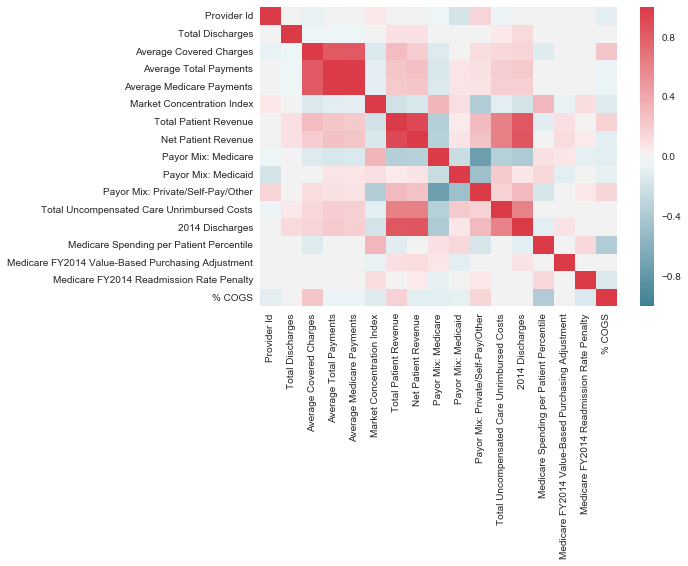

In [29]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)

correlations = data.corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

In [30]:
data[['Provider Id','DRG Definition']].groupby(['DRG Definition']).count().sort('Provider Id', ascending=False)

/Users/Shaan/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Provider Id
DRG Definition,
194 - SIMPLE PNEUMONIA & PLEURISY W CC,2757
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC,2756
292 - HEART FAILURE & SHOCK W CC,2706
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",2675
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,2663
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,2643
603 - CELLULITIS W/O MCC,2598
291 - HEART FAILURE & SHOCK W MCC,2586
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W/O MCC,2529


In [31]:
data_vis = data.loc[data['DRG Definition'].isin(['292 - HEART FAILURE & SHOCK W CC', '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC', '191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC'])]

In [32]:
data_vis.shape

(7757, 26)

In [33]:
data_vis.head()

,DRG Definition,Provider Id,Provider Name,Provider State,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments,Ownership,...,Payor Mix: Medicare,Payor Mix: Medicaid,Payor Mix: Private/Self-Pay/Other,Total Uncompensated Care Unrimbursed Costs,2014 Discharges,Medicare Spending per Patient Percentile,Medicare FY2014 Value-Based Purchasing Adjustment,Medicare FY2014 Readmission Rate Penalty,Education Designation,% COGS
34748,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,103,22269.75728,5525.281553,4670.601942,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,46.0,0.0010,0.0,No,0.807248
132396,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,206,45652.65534,11839.597090,10499.402910,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,46.0,0.0010,0.0,No,0.807248
77107,292 - HEART FAILURE & SHOCK W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,AL,AL - Dothan,163,23776.72393,5865.950920,5068.036810,Governmental - County,...,0.455,0.131,0.413,26210303.0,18489.0,46.0,0.0010,0.0,No,0.807248
132397,470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT ...,10005,MARSHALL MEDICAL CENTER SOUTH,AL,AL - Birmingham,170,31178.92941,11490.970590,10043.088240,Governmental - County,...,0.462,0.179,0.359,9858366.0,8849.0,57.0,0.0021,0.0,No,0.692511
34749,191 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W CC,10005,MARSHALL MEDICAL CENTER SOUTH,AL,AL - Birmingham,81,12789.22222,5298.345679,4276.271605,Governmental - County,...,0.462,0.179,0.359,9858366.0,8849.0,57.0,0.0021,0.0,No,0.692511


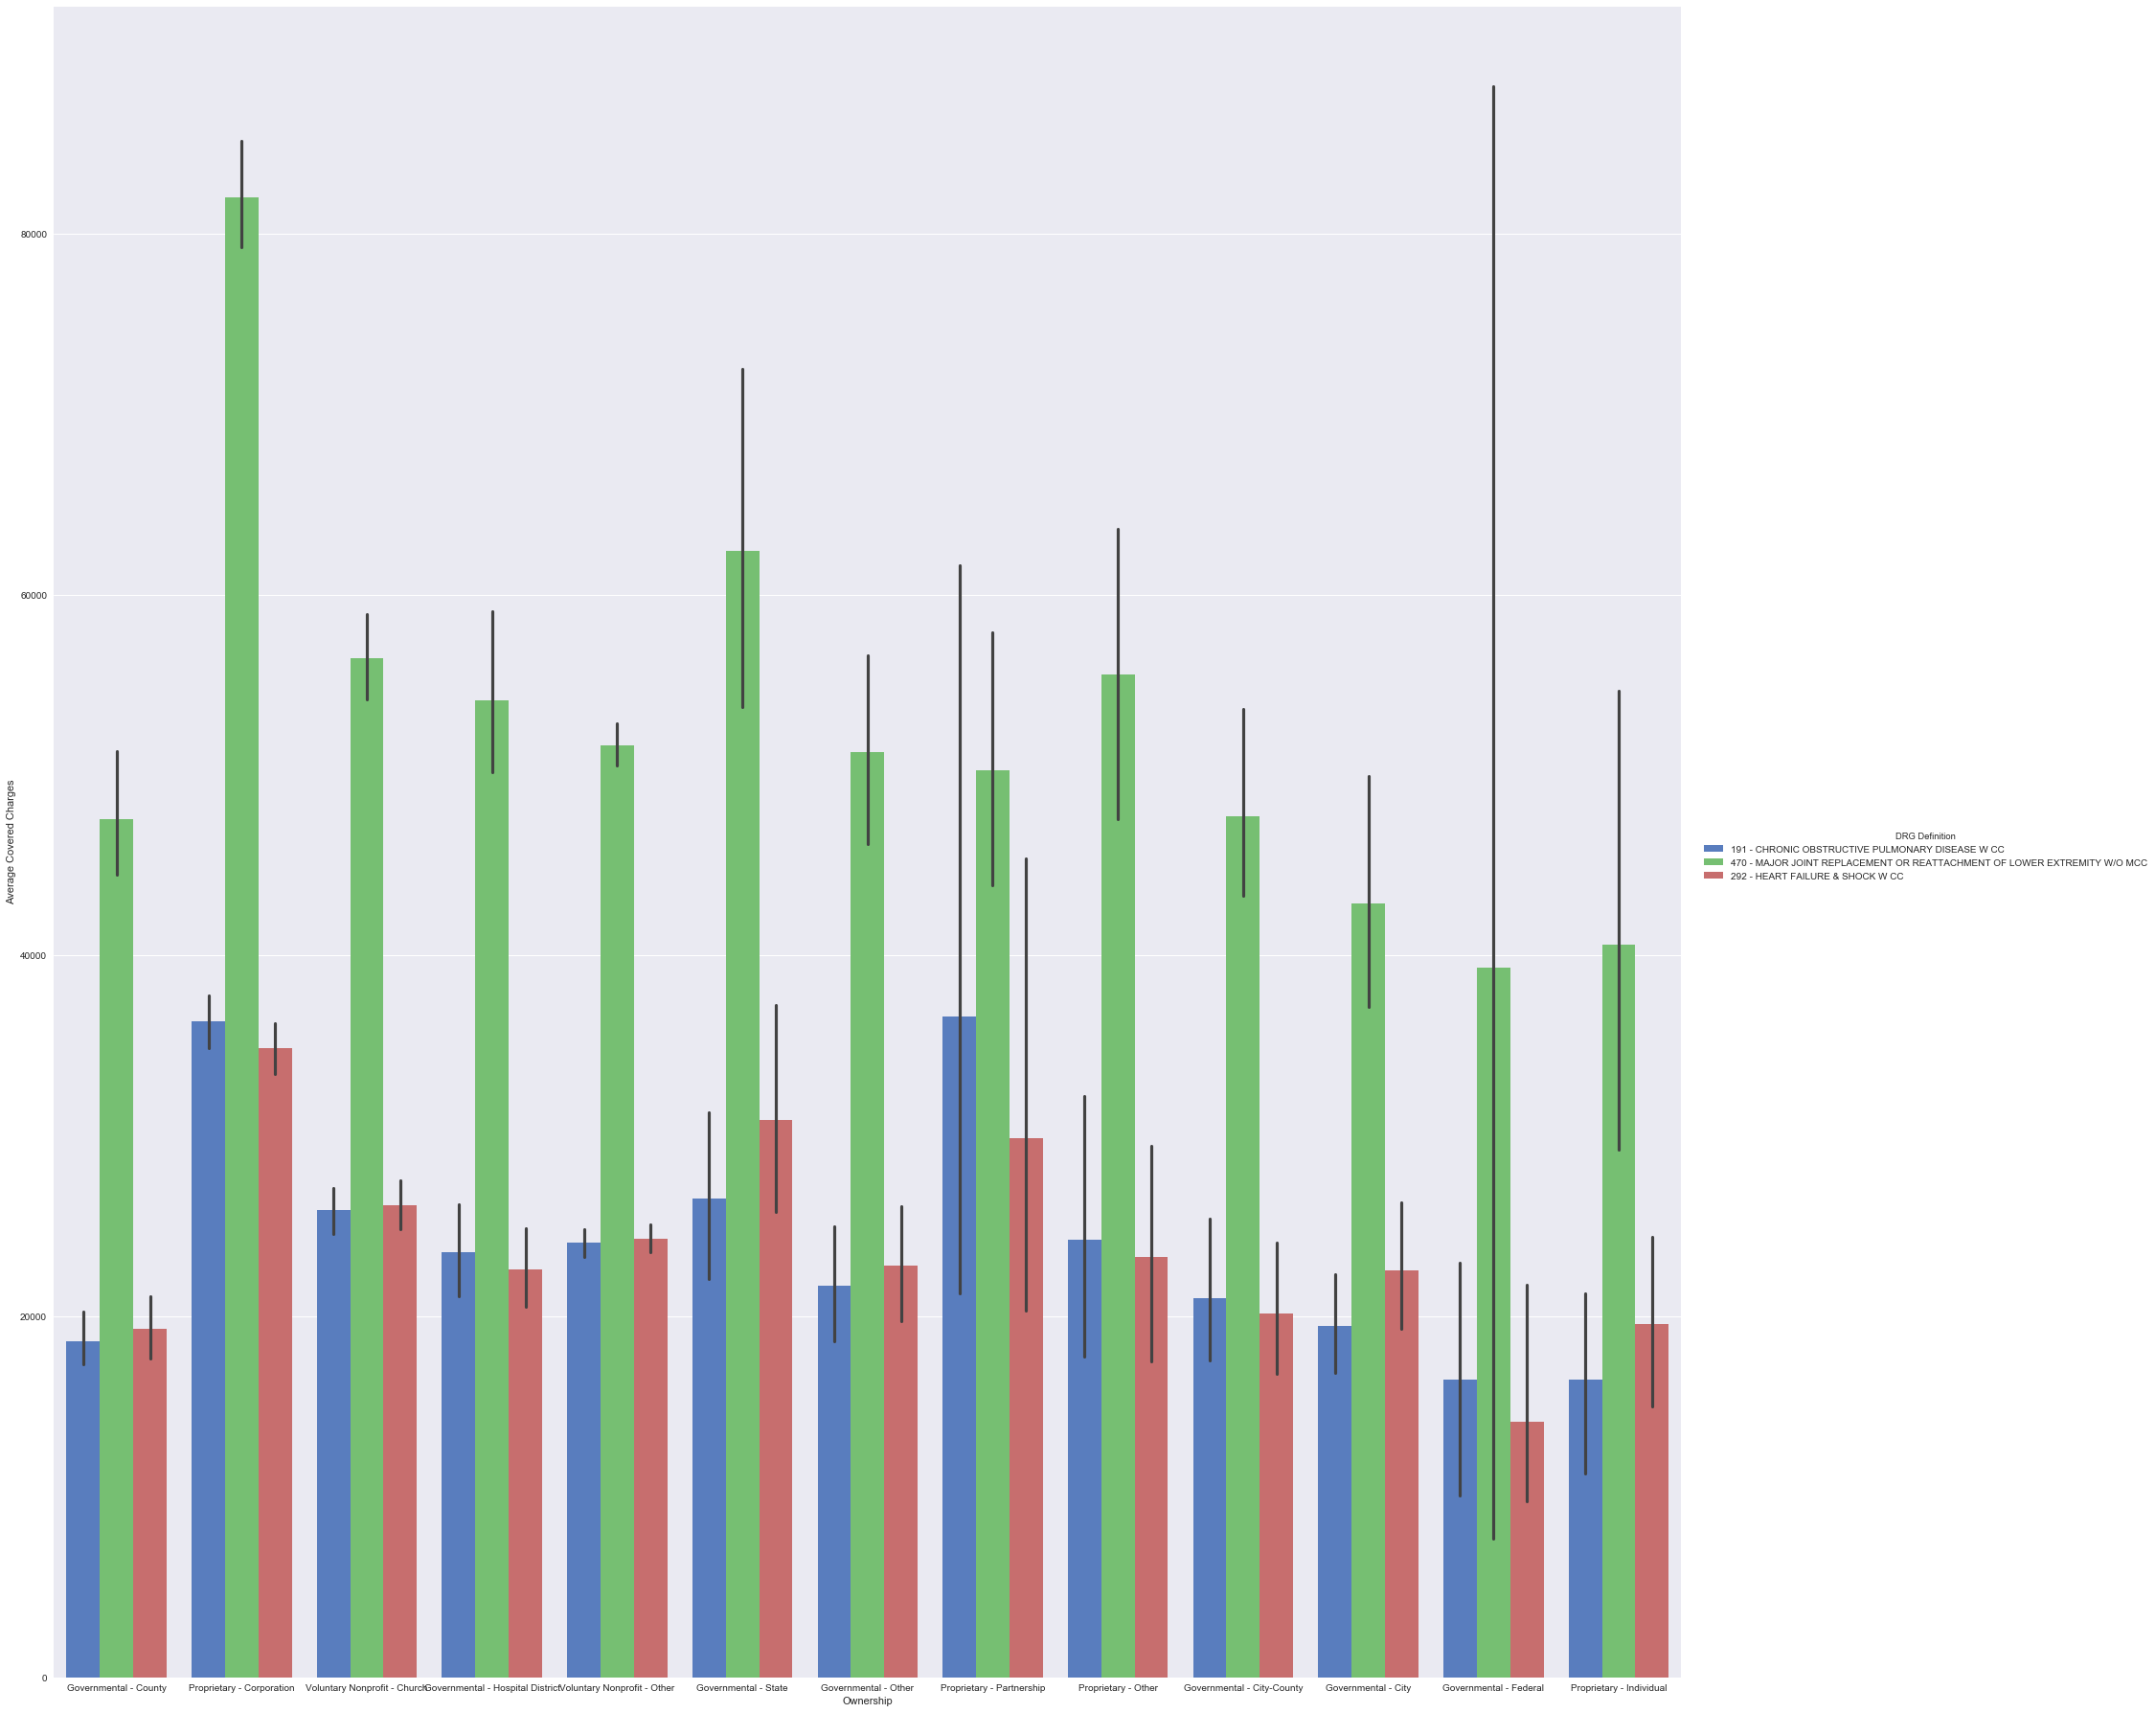

In [34]:
g = sns.factorplot(x="Ownership", y="Average Covered Charges", hue="DRG Definition", data=data_vis,
                   size=25, kind="bar", palette="muted")
g.despine(left=True)

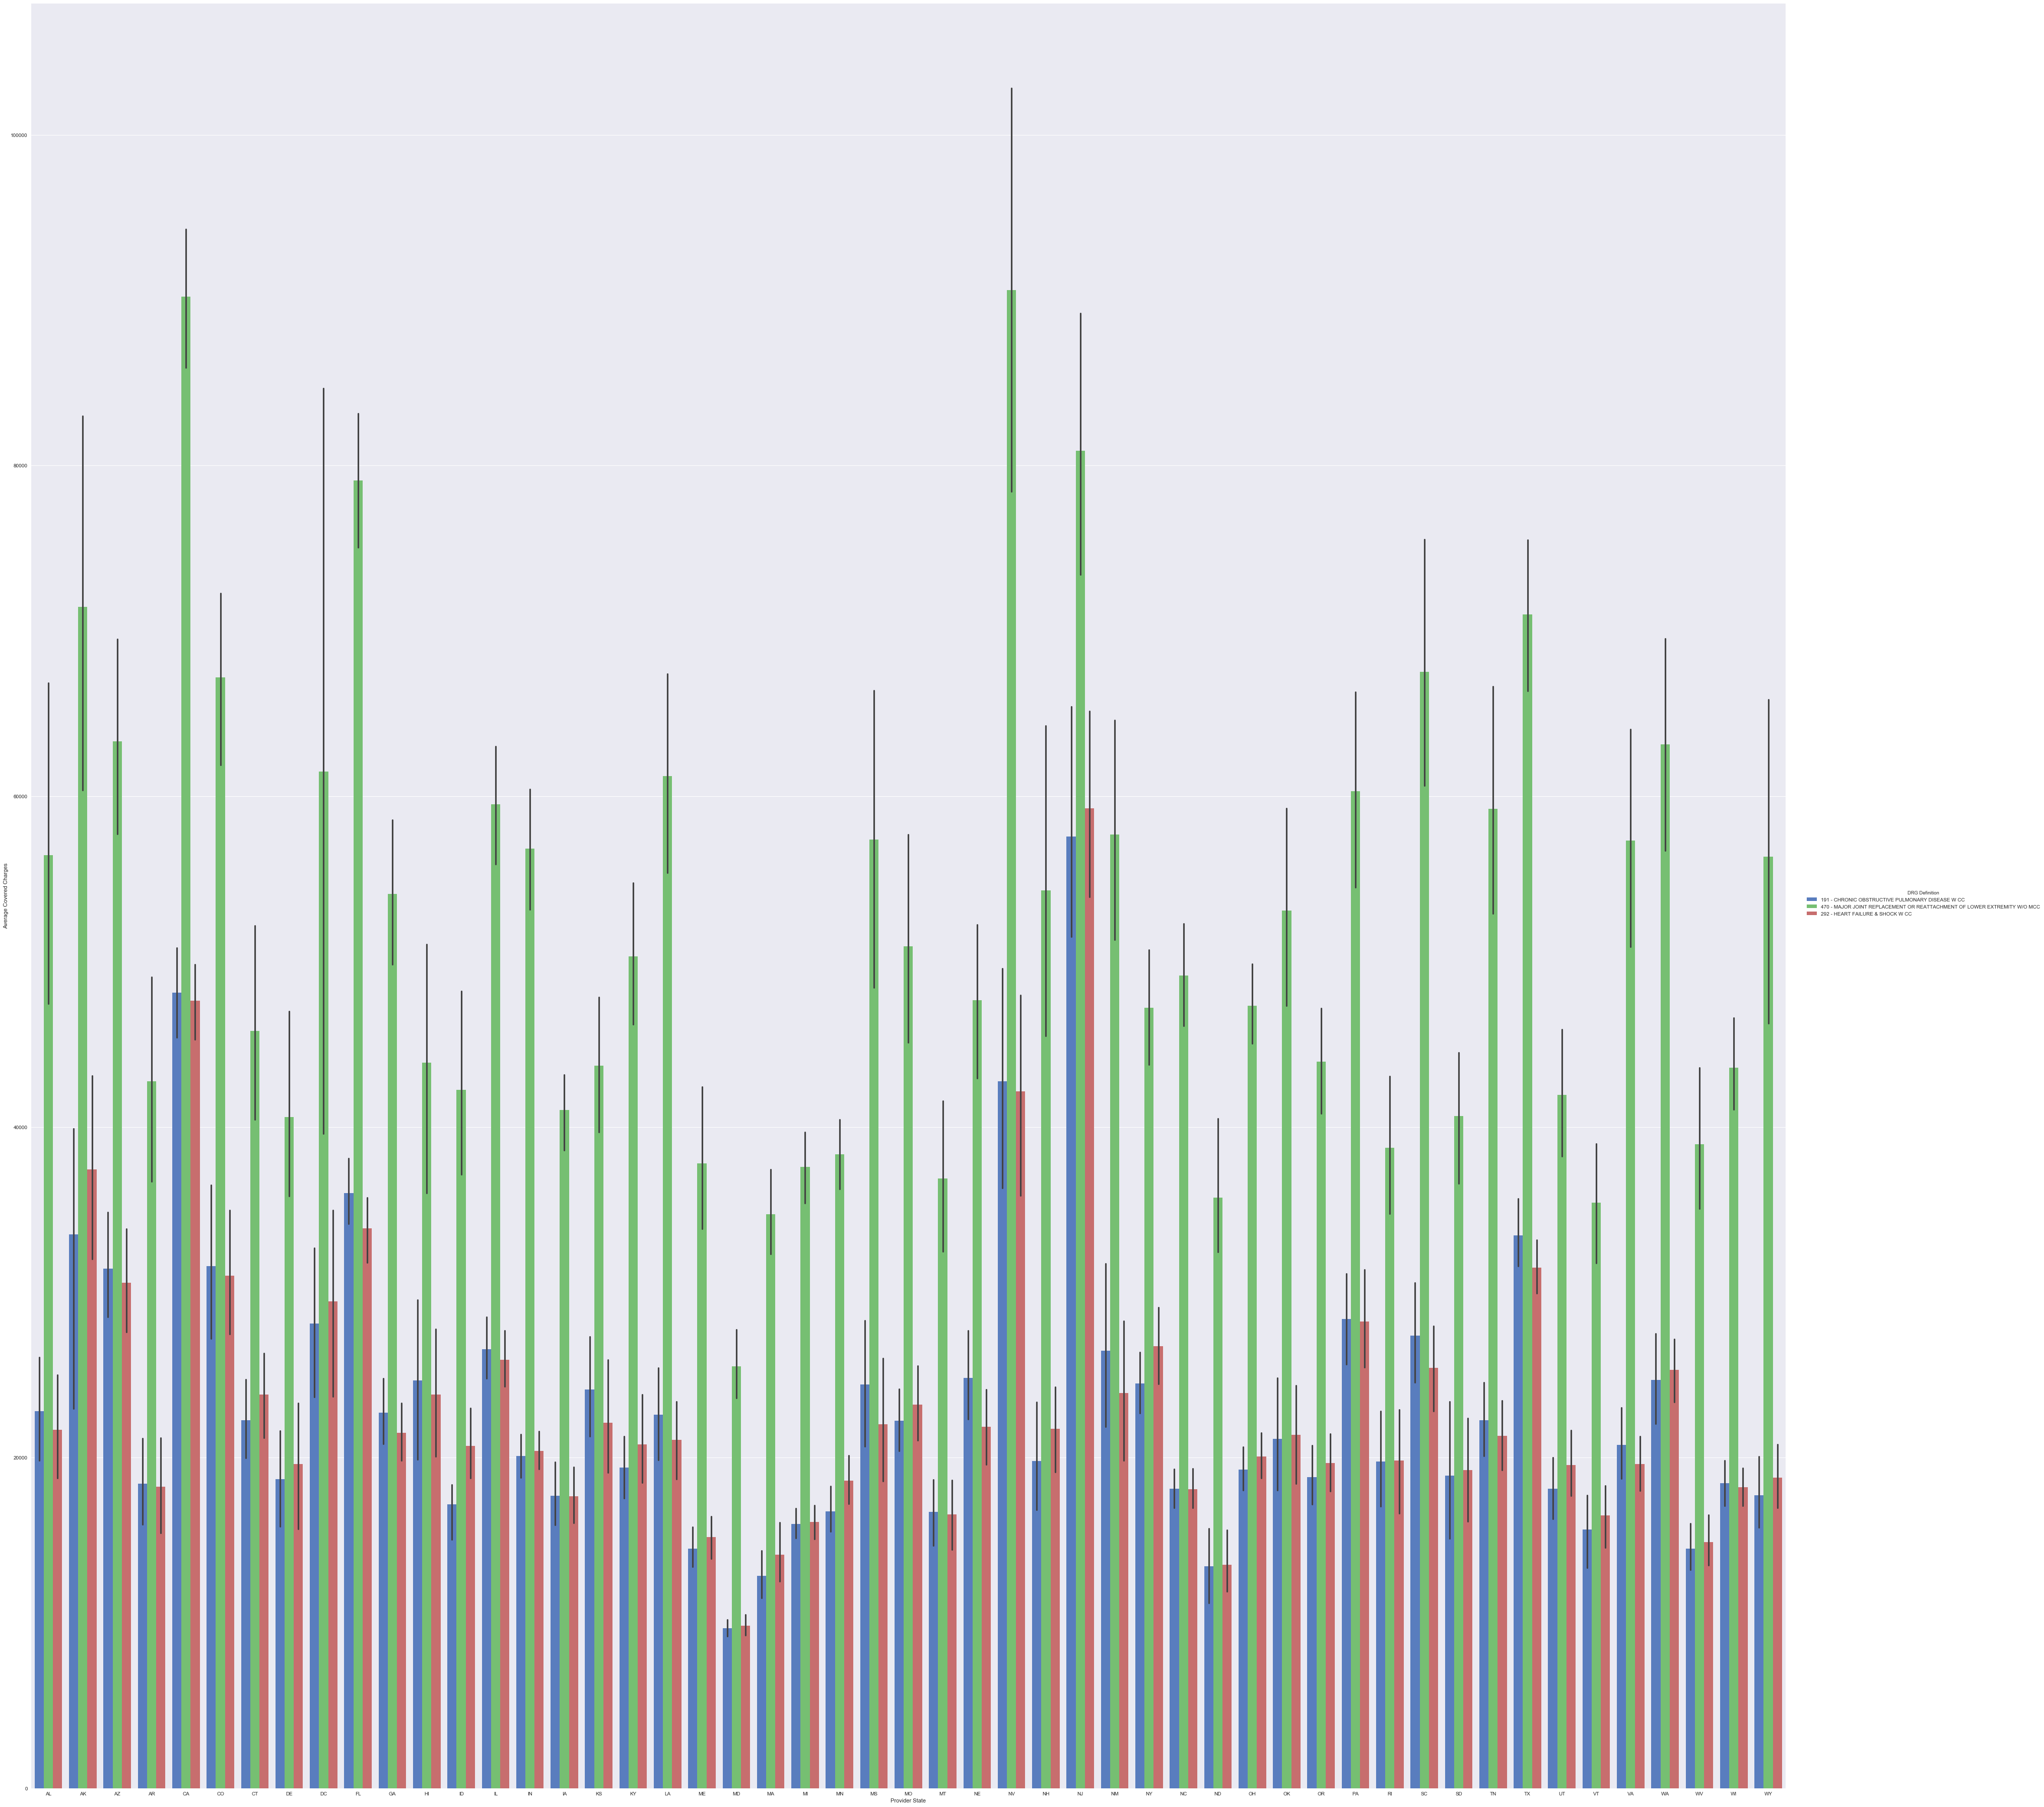

In [35]:
g1 = sns.factorplot(x="Provider State", y="Average Covered Charges", hue="DRG Definition", data=data_vis,
                   size=50, kind="bar", palette="muted")
g1.despine(left=True)

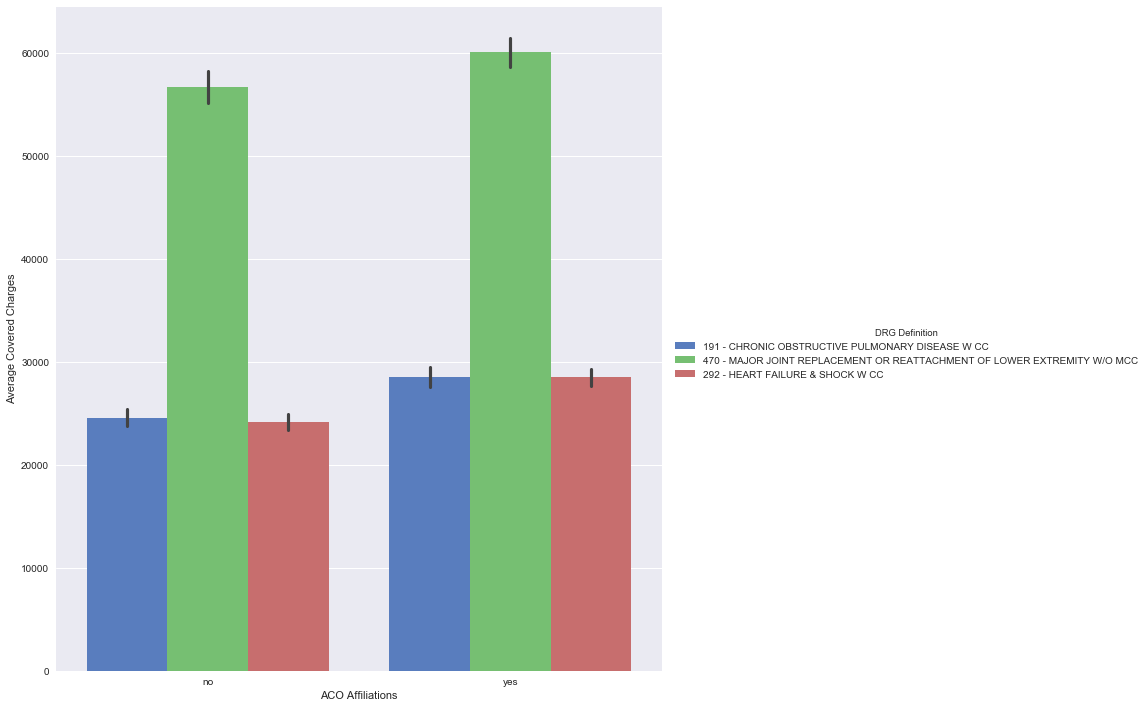

In [36]:
g2 = sns.factorplot(x="ACO Affiliations", y="Average Covered Charges", hue="DRG Definition", data=data_vis,
                   size=10, kind="bar", palette="muted")
g2.despine(left=True)

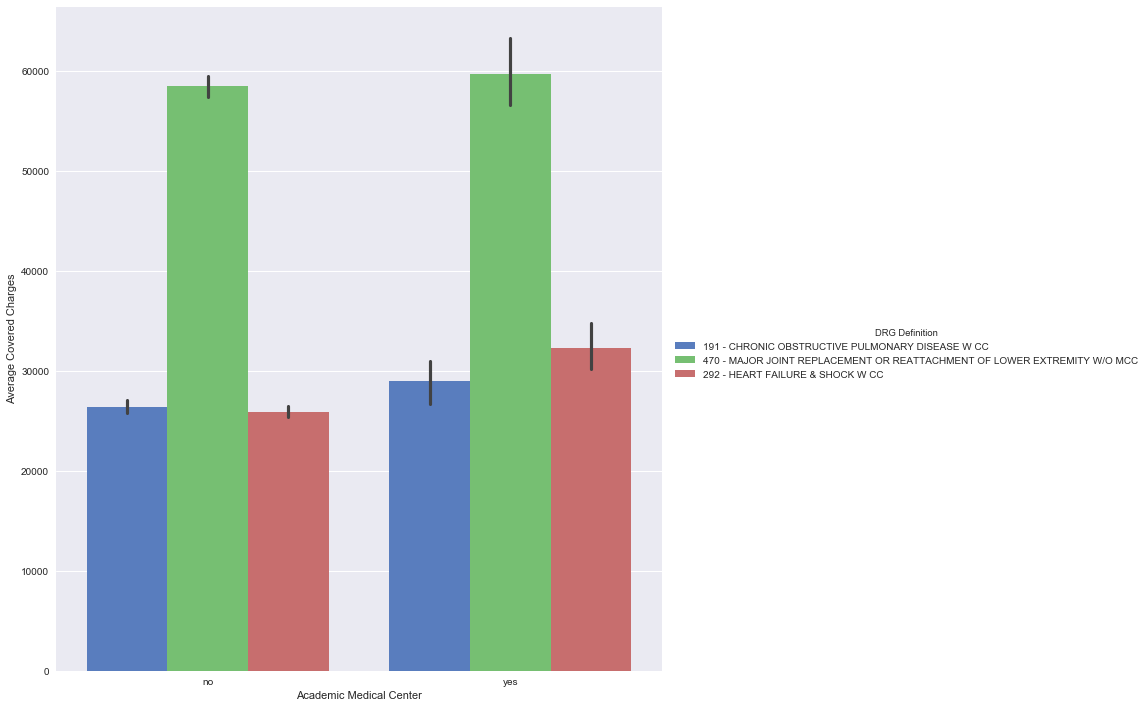

In [37]:
g3 = sns.factorplot(x="Academic Medical Center", y="Average Covered Charges", hue="DRG Definition", data=data_vis,
                   size=10, kind="bar", palette="muted")
g3.despine(left=True)

In [38]:
log_columns = ['Average Covered Charges']  # any others?
log_data_vis = data_vis.copy()
log_data_vis[log_columns] = log_data_vis[log_columns].apply(np.log10)

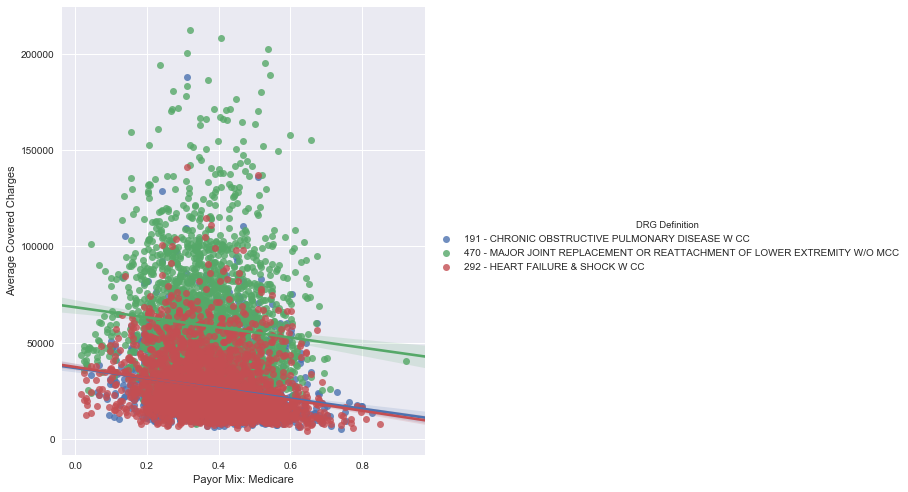

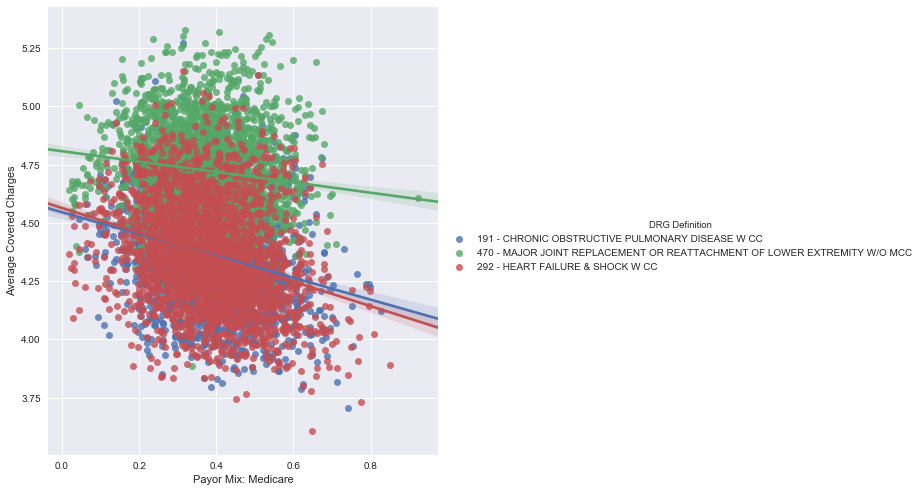

In [39]:
print sns.lmplot(x="Payor Mix: Medicare", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="Payor Mix: Medicare", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

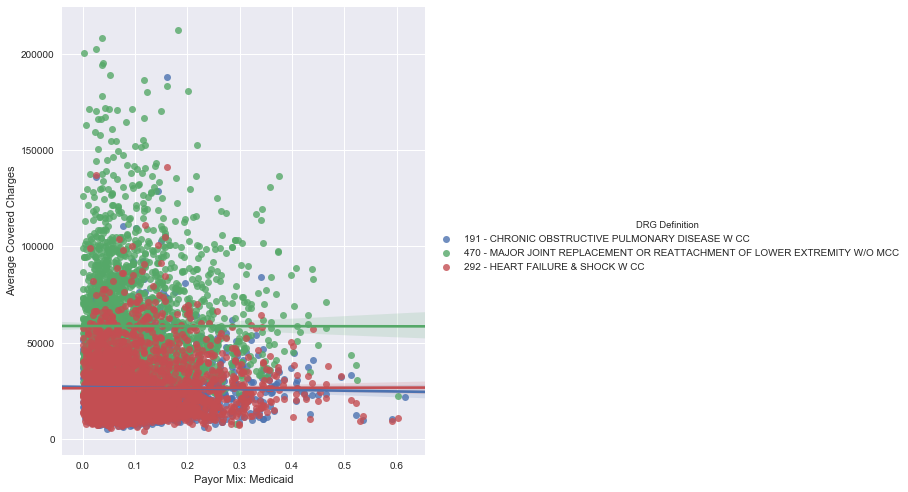

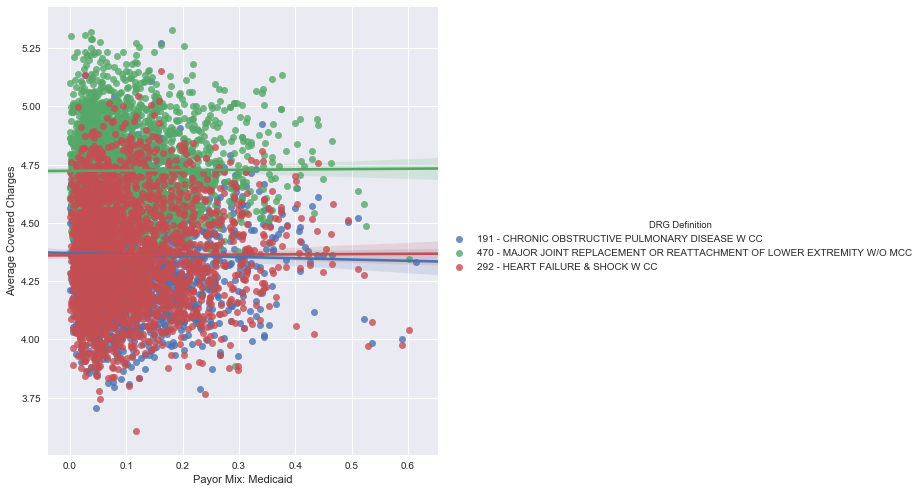

In [40]:
print sns.lmplot(x="Payor Mix: Medicaid", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="Payor Mix: Medicaid", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

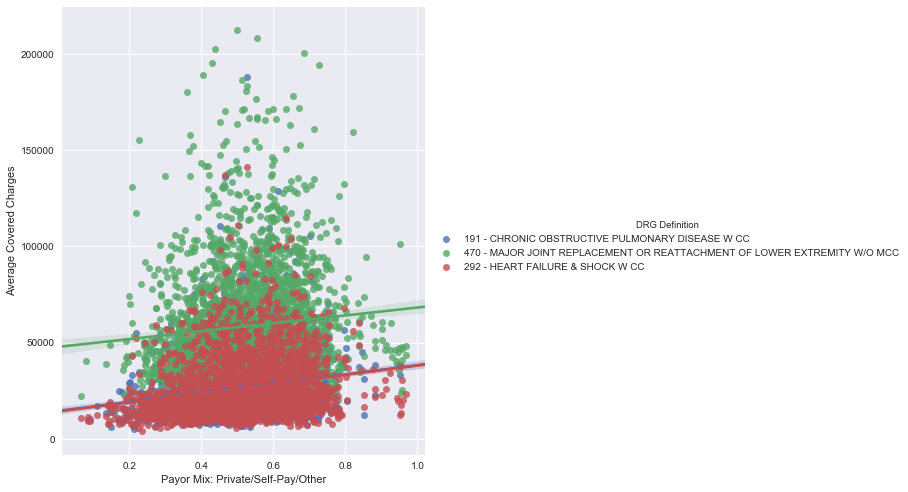

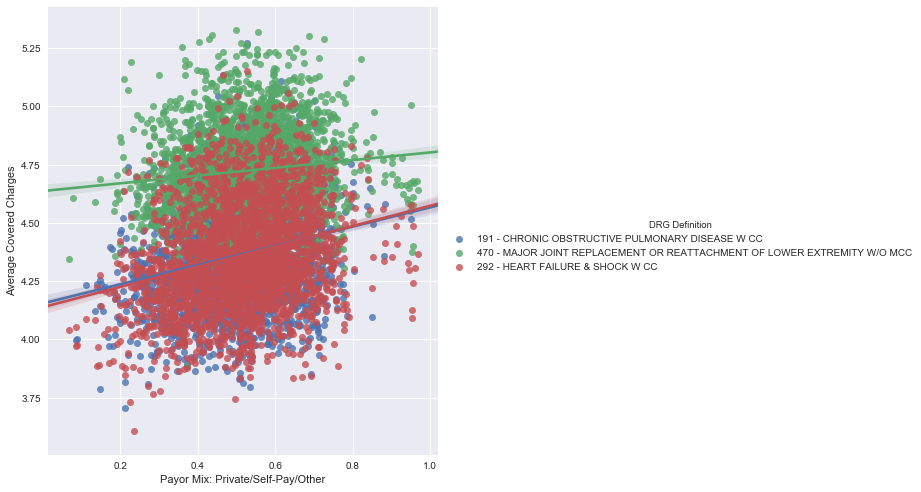

In [41]:
print sns.lmplot(x="Payor Mix: Private/Self-Pay/Other", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="Payor Mix: Private/Self-Pay/Other", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

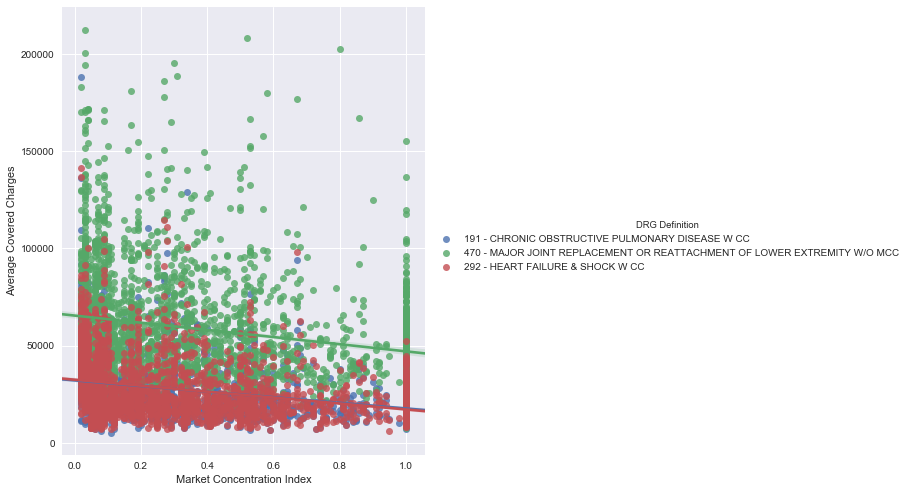

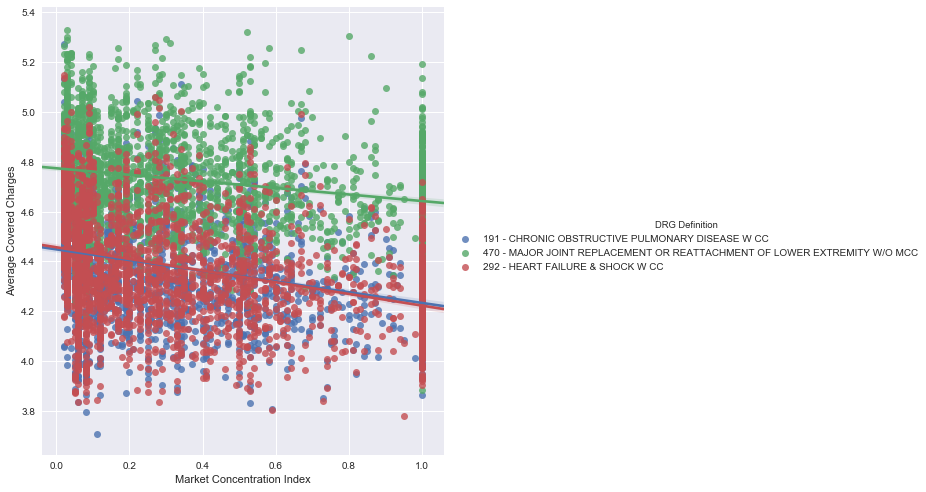

In [42]:
print sns.lmplot(x="Market Concentration Index", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="Market Concentration Index", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

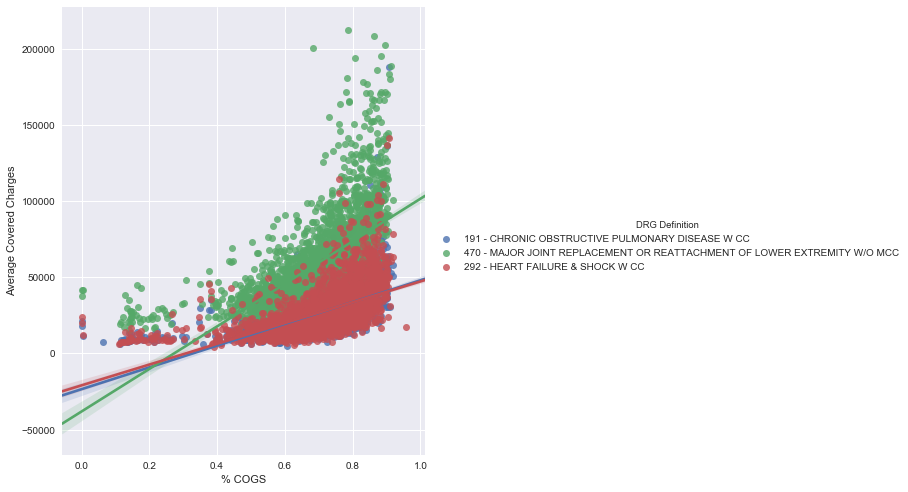

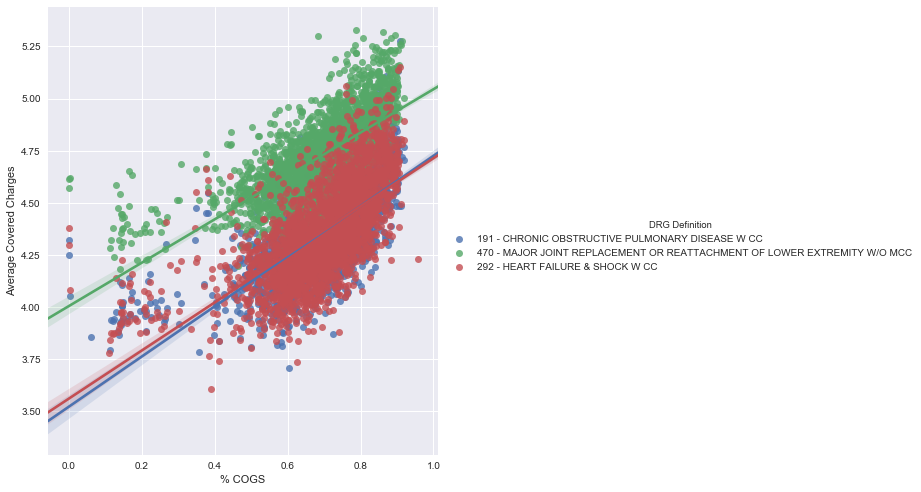

In [43]:
print sns.lmplot(x="% COGS", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="% COGS", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

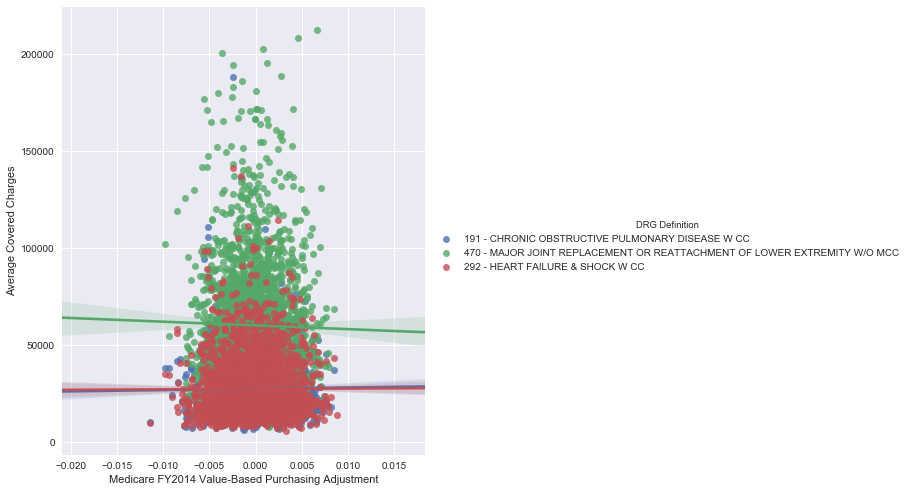

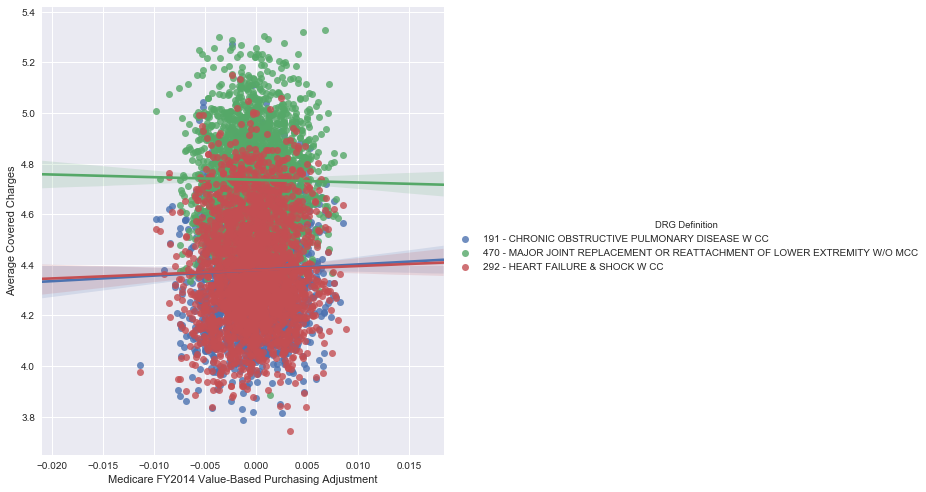

In [44]:
print sns.lmplot(x="Medicare FY2014 Value-Based Purchasing Adjustment", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="Medicare FY2014 Value-Based Purchasing Adjustment", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

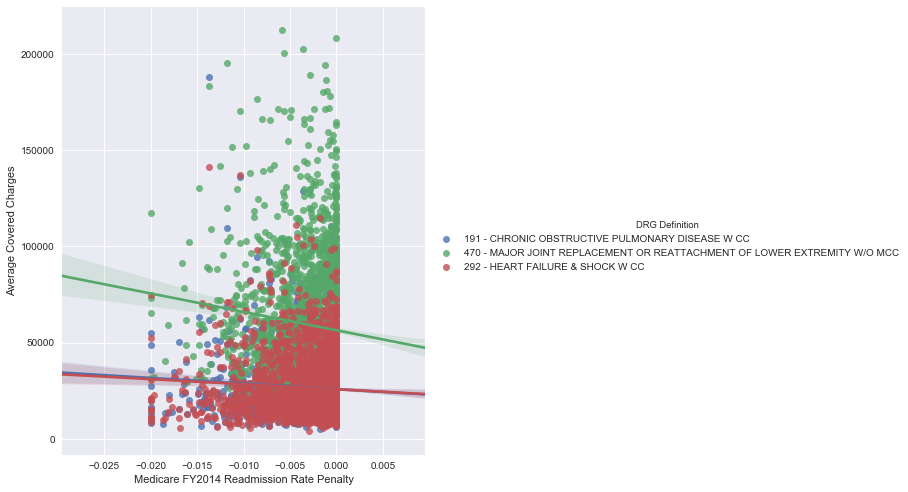

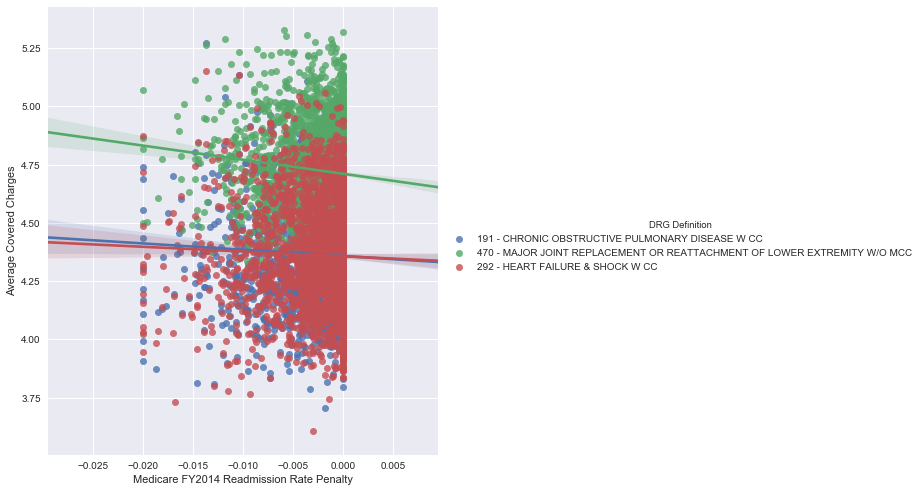

In [45]:
print sns.lmplot(x="Medicare FY2014 Readmission Rate Penalty", y="Average Covered Charges", hue="DRG Definition", data=data_vis, size=7)
print sns.lmplot(x="Medicare FY2014 Readmission Rate Penalty", y="Average Covered Charges", hue="DRG Definition", data=log_data_vis, size=7)

Takeawys from exploratory analysis:

1) The Hospital Ownership, Provider State, and other descriptors of the Hospital Type (Academic Status, ACO) are important factors to consider.

2) Having more patients with private insurance may help explain higher prices.

3) COGS is directly correlated with prices.

4) Quality metrics appear to have no correlation with prices. 